# Models AMF challenge

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import sklearn.metrics
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,  AdaBoostClassifier

# See the EDA file for preprocessing details.

(array([22349.,     0.,     0.,     0.,     0., 51483.,     0.,     0.,
            0., 31950.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

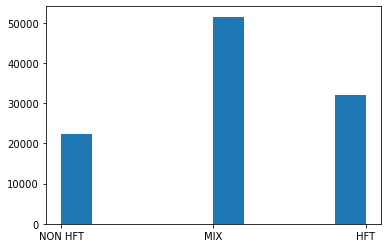

In [2]:
X = pd.read_csv('Xtrain.csv')
y_class = pd.read_csv('ytrain.csv')


X = pd.merge(X, y_class, how='inner', on='Trader') 
y_samples_class = X.pop("type") 

plt.hist(y_samples_class)

# Preprocessing :

In [3]:
def imputation(X): # delete useless columns
    
    X=X.drop('Index', axis=1) 
    X=X.drop('Share', axis=1)
    X=X.drop('Day', axis=1)
    X=X.drop("Trader",axis=1)
    
    #X.dropna(axis=1, inplace=True) # first try but has been improved with mean imputation
  
    return  X

X = imputation(X)

In [4]:
columns_names = X.columns

imputer = SimpleImputer( missing_values = np.nan,  strategy ='mean' ) # best strategy after many tries
# imputer2= KNNImputer(n_neighbors=1) # worse

X = imputer.fit_transform(X)

# Different models comparison :

In [5]:
X_train, X_test, y_train, y_test = train_test_split( X, y_samples_class, test_size=0.2, random_state=0 )

In [6]:
def evaluation( model, X_train, y_train, X_test, y_test ):
    
    model.fit( X_train, y_train )
    ypred = model.predict( X_test )
    
    print( 'score f1', f1_score( y_test, ypred, average='micro') )
    print( confusion_matrix( y_test, ypred ) )
    print( classification_report( y_test, ypred ) )
    

In [7]:
forest = RandomForestClassifier( random_state=0 )
ada = AdaBoostClassifier( random_state=0 )
knn = KNeighborsClassifier()
logistic = make_pipeline( StandardScaler(), LogisticRegression(random_state=0) )
xg = xgb.XGBClassifier( verbosity=0 )

list_of_models = [ forest, xg, ada, knn, logistic]

for model in list_of_models:
    print( model )
    evaluation( model, X_train, y_train, X_test, y_test )
    print('##################################################################################')

RandomForestClassifier(random_state=0)
score f1 0.9772179420522759
[[ 6174   132    41]
 [   34 10108   107]
 [   43   125  4393]]
              precision    recall  f1-score   support

         HFT       0.99      0.97      0.98      6347
         MIX       0.98      0.99      0.98     10249
     NON HFT       0.97      0.96      0.97      4561

    accuracy                           0.98     21157
   macro avg       0.98      0.97      0.98     21157
weighted avg       0.98      0.98      0.98     21157

##################################################################################
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_j

C:\Users\pierr\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


score f1 0.983787871626412
[[ 6236    77    34]
 [   34 10123    92]
 [   32    74  4455]]
              precision    recall  f1-score   support

         HFT       0.99      0.98      0.99      6347
         MIX       0.99      0.99      0.99     10249
     NON HFT       0.97      0.98      0.97      4561

    accuracy                           0.98     21157
   macro avg       0.98      0.98      0.98     21157
weighted avg       0.98      0.98      0.98     21157

##################################################################################
AdaBoostClassifier(random_state=0)
score f1 0.8473791180224041
[[5505  686  156]
 [ 691 8236 1322]
 [ 120  254 4187]]
              precision    recall  f1-score   support

         HFT       0.87      0.87      0.87      6347
         MIX       0.90      0.80      0.85     10249
     NON HFT       0.74      0.92      0.82      4561

    accuracy                           0.85     21157
   macro avg       0.84      0.86      0.85     21157
w

C:\Users\pierr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score f1 0.7937325707803564
[[4105 1979  263]
 [ 944 8840  465]
 [ 176  537 3848]]
              precision    recall  f1-score   support

         HFT       0.79      0.65      0.71      6347
         MIX       0.78      0.86      0.82     10249
     NON HFT       0.84      0.84      0.84      4561

    accuracy                           0.79     21157
   macro avg       0.80      0.78      0.79     21157
weighted avg       0.79      0.79      0.79     21157

##################################################################################


# Features importance

<AxesSubplot:>

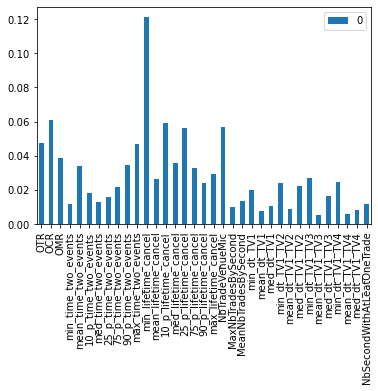

In [8]:
pd.DataFrame(forest.feature_importances_, index=columns_names).plot.bar() 

<AxesSubplot:>

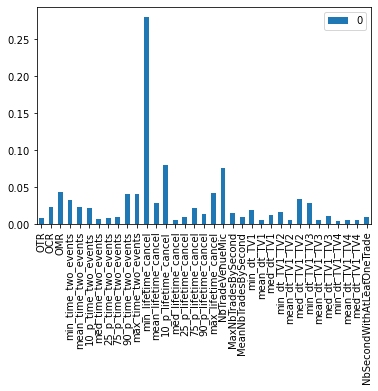

In [9]:
pd.DataFrame(xg.feature_importances_, index=columns_names).plot.bar()

# Learning curves :

In [11]:
def curves(model, X, y):
          
    N, train_score, val_score = learning_curve( model, X, y, cv=4, scoring='f1_micro', train_sizes = np.linspace( 0.1, 1, 5 ) )

    plt.figure()
    plt.plot( N, train_score.mean(axis=1), label='train' )
    plt.plot( N, val_score.mean(axis=1), label='test' )
    plt.legend()

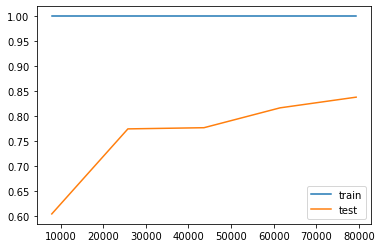

In [12]:
curves( forest, X, y_samples_class)

C:\Users\pierr\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pierr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pierr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pierr\anaconda3\lib\site-packages\xgboost\core.py", line 421, in inner_f
    return f(**kwargs)
  File "C:\U

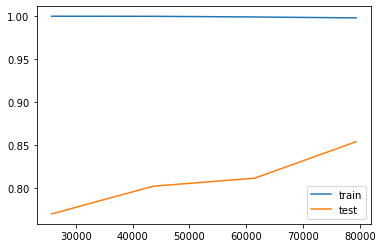

In [13]:
curves(xg, X, y_samples_class)

# Gridsearch for xgboost.


In [10]:
xgb.XGBClassifier().get_params().keys()

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [11]:
pipeline_xg = make_pipeline( StandardScaler(), xgb.XGBClassifier( use_label_encoder=True, verbosity=0 ) )
pipeline_xg # to see the different steps and their name

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, gamma=None, gpu_id=None,
                               importance_type='gain',
                               interaction_constraints=None, learning_rate=None,
                               max_delta_step=None, max_depth=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, reg_alpha=None,
                               reg_lambda=None, scale_pos_weight=None,
                               subsample=None, tree_method=None,
                               validate_parameters=None, verbosity=0))])

In [23]:
hyper_params={'xgbclassifier__max_depth':[ 2, 3, 4, 6 ],
              'xgbclassifier__gamma':[ 0, 1, 10 ],
              'xgbclassifier__learning_rate':[ 0.9, 1 ],
              'xgbclassifier__reg_lambda':[ 0, 1, 2 ],
              'xgbclassifier__n_estimators':[ 200, 300 ]} 

grid = RandomizedSearchCV( pipeline_xg, hyper_params, scoring='f1_micro', cv=3 , n_iter = 1 )
grid.fit( X_train, y_train )

best_model_xg = grid.best_estimator_
evaluation( best_model_xg, X_train, y_train, X_test, y_test)
print( grid.best_params_ )



C:\Users\pierr\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pierr\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pierr\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

score f1 0.9725859053741078
[[ 6150   146    51]
 [   69 10033   147]
 [   54   113  4394]]
              precision    recall  f1-score   support

         HFT       0.98      0.97      0.97      6347
         MIX       0.97      0.98      0.98     10249
     NON HFT       0.96      0.96      0.96      4561

    accuracy                           0.97     21157
   macro avg       0.97      0.97      0.97     21157
weighted avg       0.97      0.97      0.97     21157

{'xgbclassifier__reg_lambda': 1, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__max_depth': 4, 'xgbclassifier__learning_rate': 1, 'xgbclassifier__gamma': 10}


# Grid search for random forest

In [ ]:
in progress

# Prediction : first, same preprocessing for X_true

In [14]:
X_true = pd.read_csv('Xtest.csv')
y_trader_all = X_true[["Trader"]]


X_true = imputation(X_true) 
X_true = imputer.transform( X_true)

In [16]:
#################################### FINAL PRED ######################################################

ypred = best_model_xg.predict( X_true ) 

#################################### FINAL PRED ######################################################

In [17]:
y_trader_all['type'] = ypred # adding a colmuns "type" with 250 000 classes


# Final submission :


In [18]:
final_submission = pd.read_csv('example_submission.csv')
final_submission

,Trader,type
0,Adelaide,NON HFT
1,Alana,NON HFT
2,Alcmene,MIX
3,Alice,MIX
4,Alices Sister,NON HFT
...,...,...
80,Monstro,NON HFT
81,Morgana,MIX
82,The Doorknob,HFT
83,The Doorman,MIX


In [19]:
for i in range( final_submission.shape[0] ): # decision rule
    trader = final_submission["Trader"][i]

    temp = y_trader_all[ ( y_trader_all["Trader"] == trader ) ] #dataframe of the rows with ONE same trader


    nb_hft = sum( temp["type"] == "HFT" )
    nb_mix = sum( temp["type"] == "MIX" )
    nb_non_hft = sum( temp["type"] == "NON HFT" )

    total = nb_hft + nb_mix + nb_non_hft

    if ( nb_hft / total > 0.85 ) :
        category = "HFT"

    elif ( nb_mix / total > 0.5 ) :
        category = "MIX"

    else:
        category="NON HFT"

    print( trader, category )
    final_submission["type"][i] = category

Adelaide NON HFT
Alana NON HFT
Alcmene NON HFT
Alice HFT
Alices Sister NON HFT
Angel (Experiment 624) NON HFT
Annette MIX
Armoire MIX
Arthur/Wart NON HFT
Axe MIX
Baby Red Bird NON HFT
Backwoods Beagle MIX
Bacon Beagle NON HFT
Baileywick MIX
Bat Queen NON HFT
Becky NON HFT
Bent-Tail the Coyote HFT
Big Al NON HFT
Big Mama MIX
Bill Green MIX
Black Bart NON HFT
Bobble NON HFT
Bomber Beagle NON HFT
Bookseller NON HFT
Boomer NON HFT
Bowler Hat Guy NON HFT
Braddock NON HFT
Brer Bear NON HFT
Brudo Avarius HFT
Bruno the Dog NON HFT
Buck Leatherleaf HFT
Bucky Oryx-Antlerson NON HFT
Butch the Bulldog MIX
Butcher Boy NON HFT
Dallben NON HFT
Danny MIX
Dennis Avarius NON HFT
Digger the Mole NON HFT
Dijon the Thief MIX
Don Karnage HFT
Donald Duck HFT
Doug Dalmatian NON HFT
Dr. Delbert Doppler NON HFT
Dr. Facilier MIX
Dr. Joshua Sweet NON HFT
Dr. Teeth NON HFT
Duchess MIX
Duke of Weselton MIX
Dylan Dalmatian NON HFT
Edric Blight NON HFT
Elliott NON HFT
Emperor Belos NON HFT
Evinrude HFT
Fairy Mary NON

In [21]:
final_submission.to_csv('essai prediction2' ,index=False)

# ############personnal notes : do not read####################

# Essai d'algorithme "récent" : catboost.

In [ ]:
pip install catboost

from catboost import CatBoostClassifier

model = CatBoostClassifier()

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]} #meilleurs: 0.1, 10, 1

grid_search_result = model.grid_search(grid, 
                                       X=X, 
                                       y=y, 
                                       plot=False)

In [ ]:
model=CatBoostClassifier(learning_rate=0.1, depth=10, l2_leaf_reg=1)
model.fit(X,y,plot=True)

# On rajoute un select kbest dans le pipeline et on essaye un randomizedsearch. NOT WORKING

In [ ]:
pipeline_forest=make_pipeline(SelectKBest(f_classif),RandomForestClassifier())
pipeline_forest#pour voir les différentes étapes et leur nom

In [ ]:
hyper_params={'selectkbest__k':[5 ,10 ,15 , 22],
              'randomforestclassifier__n_estimators':[100, 200, 300],
              'randomforestclassifier__max_depth':[3, 5, 10]}


grid=RandomizedSearchCV(pipeline_forest,hyper_params,scoring='f1_micro', cv=5, n_iter=3)
grid.fit(X_train, y_train)

print(grid.best_params_)

meilleure_forest_random = grid.best_estimator_
evaluation(meilleure_forest_random)